170508288/170498071 [==============================] - 2s 0us/step
Training Images:(50000, 32, 32, 3)
Testing Images:(10000, 32, 32, 3)
(32, 32, 3)


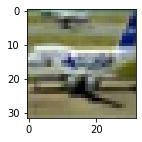

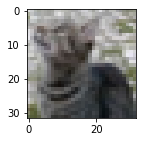

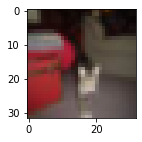

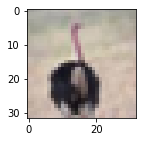

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
print('Training Images:{}'.format(X_train.shape))
print('Testing Images:{}'.format(X_test.shape))
print(X_train[0].shape)
for i in range(332,336):
  plt.subplots(figsize=(2,2))
  img= X_train[i]
  plt.imshow(img)
  plt.show()
X_train=X_train.reshape(X_train.shape[0],32,32,3)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test=X_test/255
n_classes=10
print("Shape before one-hot encoding: ",Y_train.shape)
Y_train = np_utils.to_categorical(Y_train,n_classes)
Y_test = np_utils.to_categorical(Y_test,n_classes)
print("Shape after one-hot encoding: ",Y_train.shape)

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model = Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

model.fit(X_train,Y_train,batch_size=128,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 549s 1s/step - loss: 1.6020 - accuracy: 0.4125 - val_loss: 1.1669 - val_accuracy: 0.5865
Epoch 2/10
391/391 [==============================] - 549s 1s/step - loss: 1.1140 - accuracy: 0.6058 - val_loss: 0.9294 - val_accuracy: 0.6819
Epoch 3/10
391/391 [==============================] - 549s 1s/step - loss: 0.9319 - accuracy: 0.6745 - val_loss: 0.8339 - val_accuracy: 0.7129
Epoch 4/10
391/391 [==============================] - 558s 1s/step - loss: 0.8191 - accuracy: 0.7134 - val_loss: 0.7883 - val_accuracy: 0.7266
Epoch 5/10
391/391 [==============================] - 554s 1s/step - loss: 0.7393 - accuracy: 0.7423 - val_loss: 0.7132 - val_accuracy: 0.7564
Epoch 6/10
391/391 [==============================] - 554s 1s/step - loss: 0.6695 - accuracy: 0.7670 - val_loss: 0.7113 - val_accuracy: 0.7557
Epoch 7/10
391/391 [==============================] - 552s 1s/step - loss: 0.6144 - accuracy: 0.7833 - val_loss: 0.6878 - val_accuracy: 0.7640

1/1 [==============================] - 0s 388ms/step
[[1.37146621e-03 1.24459140e-04 1.41002834e-01 1.55844865e-02
  6.51158869e-01 4.19597439e-02 1.37717603e-03 1.46645173e-01
  3.46514862e-04 4.29343287e-04]
 [1.20829354e-04 2.91236793e-05 8.21196362e-02 1.08617648e-01
  1.32438719e-01 5.42966306e-01 6.52591363e-02 6.80027977e-02
  2.06889803e-04 2.38873821e-04]
 [9.15736091e-05 8.39124696e-05 3.11158667e-03 2.29234435e-02
  6.73314615e-04 4.27237479e-03 9.68360186e-01 1.38042102e-04
  7.34346613e-05 2.72077916e-04]
 [5.41016391e-07 1.04979470e-07 4.63131983e-05 9.79277790e-01
  1.43048889e-03 1.45901311e-02 4.64645913e-03 7.66204175e-06
  3.56638239e-08 4.18899930e-07]
 [5.52223128e-07 9.96977091e-01 5.47750820e-12 1.01054852e-12
  3.86844928e-14 1.05004582e-14 4.85418259e-12 4.92053907e-14
  1.67146791e-05 3.00557958e-03]
 [9.13227450e-06 9.99023080e-01 1.76774095e-09 1.75438253e-09
  1.41091587e-12 7.25596735e-11 5.89988680e-09 9.45518924e-12
  6.76360331e-04 2.91374163e-04]
 [2.6

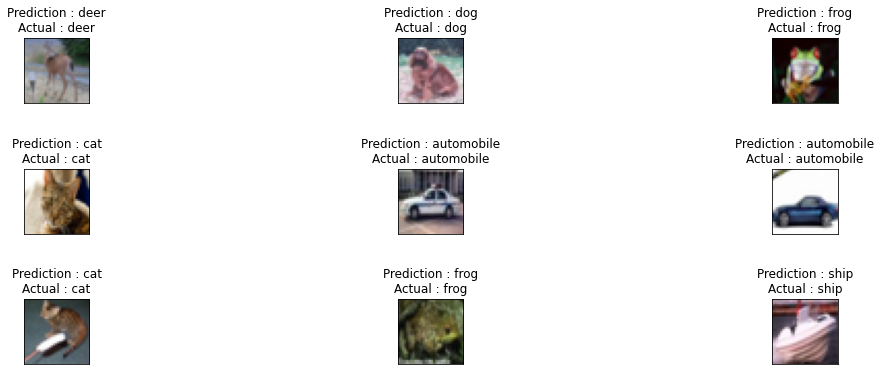

In [3]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','duck']
class_labels = dict(zip(classes,names))

batch = X_test[100:109]
labels= np.argmax(Y_test[100:109],axis=-1)
predictions = model.predict(batch, verbose = 1)
print(predictions)
for image in predictions:
  print(np.sum(image))
class_result=np.argmax(predictions,axis=-1)
print(class_result)
fig, axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs= axs.flatten()
for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction : {}\nActual : {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()